Explore data first

In [297]:
import pandas as pd

data_path = '../data.csv'

data_df = pd.read_csv(data_path)

data_df.describe()


,km,price
count,24.000000,24.000000
mean,101066.250000,6331.833333
std,52674.245606,1319.654193
min,22899.000000,3650.000000
25%,65020.500000,5687.500000
50%,83014.500000,6495.000000
75%,140975.000000,7115.000000
max,240000.000000,8290.000000


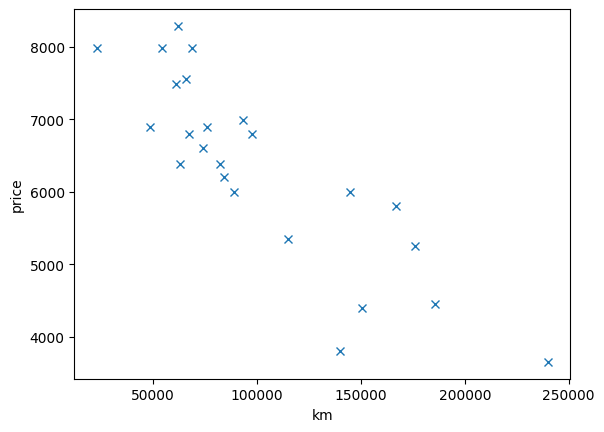

In [298]:
import matplotlib.pyplot as plt

plt.plot(data_df['km'], data_df['price'], 'x')
plt.xlabel ('km')
plt.ylabel('price')
plt.show()


Data is only 1 dimension, we'll go for a simple linear regression.
First we prepare our x and y vectors, then we fit a linear regression model with them.

In [299]:
x = data_df[['km']]
y = data_df['price']

from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

# x = x.values.reshape(-1, 1)

linear_regression_model.fit(x, y)

print("a =", linear_regression_model.coef_[0], ", b =", linear_regression_model.intercept_)

a = -0.0214489635917023 , b = 8499.599649933216


Now that we have fitted our linear regression model, let's take a look at it.

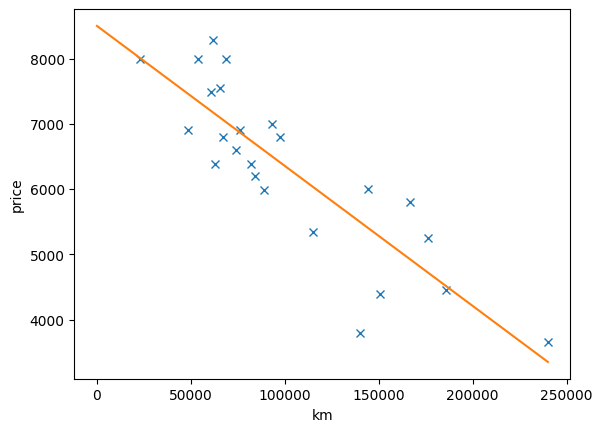

In [300]:
min_x = 0
max_x = max(data_df['km'])
dict = {'km': [min_x, max_x]}
test_x = pd.DataFrame(dict)
min_y, max_y = linear_regression_model.predict(test_x)

plt.plot(data_df['km'], data_df['price'], 'x')
plt.plot([min_x, max_x], [min_y, max_y])
plt.xlabel ('km')
plt.ylabel('price')
plt.show()

We can see the line seems to be a decent approximation of the given data. Now let's quantify ho well it performs, by refitting a new model and splitting our dataset in two part: the training and testing sets.

In [301]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_df[['km']], data_df['price'], random_state=0)

In [302]:
from sklearn.metrics import mean_absolute_error, r2_score

test_linregmod = LinearRegression()

test_linregmod.fit(train_x, train_y)

predictions = test_linregmod.predict(test_x)

mea = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

mean_error_ratio = mea * 100 /data_df['price'].mean()

print(f"Average error = {mea}\nR2 score = {r2}\nWhen comparing with an average price of {data_df['price'].mean()},\nit represents an average {mean_error_ratio:.1f}% error.")

Average error = 702.335148450064
R2 score = 0.5897595520132133
When comparing with an average price of 6331.833333333333,
it represents an average 11.1% error.


We can see that for a given random_state var of 0 in the splitter, we get a R2 of 0.59, which is not a really high correlation. By changing it we see very different score values, meaning our test dataset may be too small. Another thing to take into consideration is that maybe second-hand car value is not linked only to the mileage. An intuitive suggestion would be to add features like brand, model, age and engine specifications.